<a href="https://colab.research.google.com/github/Abhilitcode/LingoDetection/blob/main/LingoDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()  # This will prompt you to upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"khaleabhishek","key":"b79cd7934595b56ec5d374f8651b5d82"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [3]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d basilb2s/language-detection

Dataset URL: https://www.kaggle.com/datasets/basilb2s/language-detection
License(s): CC0-1.0
language-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip language-detection.zip

Archive:  language-detection.zip
replace Language Detection.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: Language Detection.csv  


This script traverses all directories and files under /kaggle/input and prints the full path of each file found. It uses os.walk(), which recursively walks the directory tree from the top down, yielding a 3-tuple (dirname, _, filenames) where:

dirname is the path to the current directory.
_ is a placeholder for the list of subdirectories (not used here).
filenames is a list of the files in the current directory.
This can be useful for listing files, checking file paths, or loading data from a Kaggle input directory.

In [6]:
!kaggle datasets download -d tarundalal/hindinlp

Dataset URL: https://www.kaggle.com/datasets/tarundalal/hindinlp
License(s): CC0-1.0
hindinlp.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!unzip hindinlp.zip -d hindinlp_data


Archive:  hindinlp.zip
replace hindinlp_data/HindiNLP.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: hindinlp_data/HindiNLP.csv  


In [8]:
import pandas as pd

In [9]:
new_hindi_df = pd.read_csv('hindinlp_data/HindiNLP.csv')  # Adjust 'hindi_sentences.csv' as needed if the filename is different


In [10]:
new_hindi_df

,English,Hindi
0,"Hello, how are you?","नमस्ते, आप कैसे हैं?"
1,What is your name?,आपका क्या नाम है?
2,Where are you from?,आप कहाँ से हैं?
3,Nice to meet you.,आपसे मिलकर अच्छा लगा।
4,How old are you?,आपकी आयु कितनी है?
...,...,...
612,Practice patience and trust the process of life.,धैर्य का अभ्यास करें और जीवन की प्रक्रिया पर भ...
613,Celebrate the successes and achievements of ot...,दूसरों की सफलताओं और उपलब्धियों का जश्न मनाएं।
614,Learn to accept and love yourself unconditiona...,खुद को बिना शर्त स्वीकार करना और प्यार करना सी...
615,Be open to feedback and continuous self-improv...,प्रतिक्रिया और निरंतर आत्म-सुधार के लिए खुले र...


In [11]:
# !pip install wget

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [13]:
df = pd.read_csv("Language Detection.csv")

In [14]:
df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [15]:
import re

In [16]:
df['Language']

,Language
0,English
1,English
2,English
3,English
4,English
...,...
10332,Kannada
10333,Kannada
10334,Kannada
10335,Kannada


In [17]:
df['Language'].value_counts()

,count
Language,
English,1385
French,1014
Spanish,819
Portugeese,739
Italian,698
Russian,692
Sweedish,676
Malayalam,594
Dutch,546


In [18]:
df[df['Language'] == 'Hindi']

,Text,Language
1979,विकि-शब्दकोष (एक मुक्त शब्दकोष एवं समानांतर को...,Hindi
1980,"[42] अंत में, विकिपीडिया एक पक्ष नहीं लेता है।...",Hindi
1981,बोट्स नामक कंप्यूटर प्रोग्राम के निर्माण के बा...,Hindi
1982,"""""नहीं, हम नहीं जानते"", जिमी ने कहा.",Hindi
1983,[60] कुछ आलोचकों का दावा है कि विकिपीडिया की ख...,Hindi
...,...,...
2037,मैं सोच रहा था कि क्या यो मेरी मदद कर सकता है।...,Hindi
2038,कैसे कुछ आइसक्रीम के बारे में?,Hindi
2039,क्या आप मुझे एक सवारी घर देना चाहेंगे?,Hindi
2040,"जी बोलिये। यह बहुत अच्छा होगा, धन्यवाद। मैं ठी...",Hindi


In [19]:
hindi_data = new_hindi_df['Hindi']

In [20]:
hindi_data.head(5)

,Hindi
0,"नमस्ते, आप कैसे हैं?"
1,आपका क्या नाम है?
2,आप कहाँ से हैं?
3,आपसे मिलकर अच्छा लगा।
4,आपकी आयु कितनी है?


In [21]:
hindi_data.shape

(617,)

In [23]:
# !kaggle datasets download -d rushikeshdarge/hindi-text-corpus


In [24]:
# !unzip hindi-text-corpus.zip -d hindi_text_data


In [25]:
# import gzip

In [26]:
# hindi_sentences = []

# # List of file paths
# file_paths = [
#     'hindi_text_data/hi_part_1.txt.gz',
#     'hindi_text_data/hi_part_2.txt.gz',
#     'hindi_text_data/hi_part_3.txt.gz',
#     'hindi_text_data/hi_part_4.txt.gz',
#     'hindi_text_data/hi_part_5.txt.gz'
# ]

# # Read each file as a regular text file
# for file_path in file_paths:
#     with open(file_path, 'r', encoding='utf-8') as file:
#         sentences = file.readlines()
#         hindi_sentences.extend([sentence.strip() for sentence in sentences])  # Strip whitespace

# # Check a few lines to verify the content
# print(hindi_sentences[:5])


In [22]:
# Create a new DataFrame for the Hindi data
hindi_df = pd.DataFrame({
    'Text': new_hindi_df['Hindi'],  # Assuming 'Hindi' is the column with the sentences
    'Language': ['Hindi'] * len(new_hindi_df)  # Create a column to mark the language
})

In [23]:
hindi_df

,Text,Language
0,"नमस्ते, आप कैसे हैं?",Hindi
1,आपका क्या नाम है?,Hindi
2,आप कहाँ से हैं?,Hindi
3,आपसे मिलकर अच्छा लगा।,Hindi
4,आपकी आयु कितनी है?,Hindi
...,...,...
612,धैर्य का अभ्यास करें और जीवन की प्रक्रिया पर भ...,Hindi
613,दूसरों की सफलताओं और उपलब्धियों का जश्न मनाएं।,Hindi
614,खुद को बिना शर्त स्वीकार करना और प्यार करना सी...,Hindi
615,प्रतिक्रिया और निरंतर आत्म-सुधार के लिए खुले र...,Hindi


In [29]:
# import pandas as pd
# import re

# # Define a function to check if a string contains mostly Hindi characters
# def is_hindi(text):
#     hindi_pattern = re.compile(r'[\u0900-\u097F]')
#     # Check if more than a few characters match the Hindi pattern
#     return bool(hindi_pattern.search(text))

In [30]:
# # Filter the new Hindi DataFrame to include only Hindi content using the is_hindi function
# new_hindi_df_filtered = new_hindi_df[new_hindi_df['Text'].apply(is_hindi)]

In [31]:
# new_hindi_df_filtered.head(50)

In [32]:
# new_hindi_df_filtered.head(1100)

In [33]:
# top_hindi_data = new_hindi_df_filtered.head(1100)

In [24]:
new_df = pd.concat([df, hindi_df], ignore_index=True)

In [25]:
new_df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10949,धैर्य का अभ्यास करें और जीवन की प्रक्रिया पर भ...,Hindi
10950,दूसरों की सफलताओं और उपलब्धियों का जश्न मनाएं।,Hindi
10951,खुद को बिना शर्त स्वीकार करना और प्यार करना सी...,Hindi
10952,प्रतिक्रिया और निरंतर आत्म-सुधार के लिए खुले र...,Hindi


In [26]:
new_df[new_df['Language'] == 'Hindi']

,Text,Language
1979,विकि-शब्दकोष (एक मुक्त शब्दकोष एवं समानांतर को...,Hindi
1980,"[42] अंत में, विकिपीडिया एक पक्ष नहीं लेता है।...",Hindi
1981,बोट्स नामक कंप्यूटर प्रोग्राम के निर्माण के बा...,Hindi
1982,"""""नहीं, हम नहीं जानते"", जिमी ने कहा.",Hindi
1983,[60] कुछ आलोचकों का दावा है कि विकिपीडिया की ख...,Hindi
...,...,...
10949,धैर्य का अभ्यास करें और जीवन की प्रक्रिया पर भ...,Hindi
10950,दूसरों की सफलताओं और उपलब्धियों का जश्न मनाएं।,Hindi
10951,खुद को बिना शर्त स्वीकार करना और प्यार करना सी...,Hindi
10952,प्रतिक्रिया और निरंतर आत्म-सुधार के लिए खुले र...,Hindi


For me the data is currently fairly balanced. initially hindi contains only 63 words. so now i feel i added more hindi data which can make better predictions for hindi. rest others were fairly balanced.

In [27]:
new_df['Language'].value_counts()

,count
Language,
English,1385
French,1014
Spanish,819
Portugeese,739
Italian,698
Russian,692
Hindi,680
Sweedish,676
Malayalam,594


Lets import the libraries.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

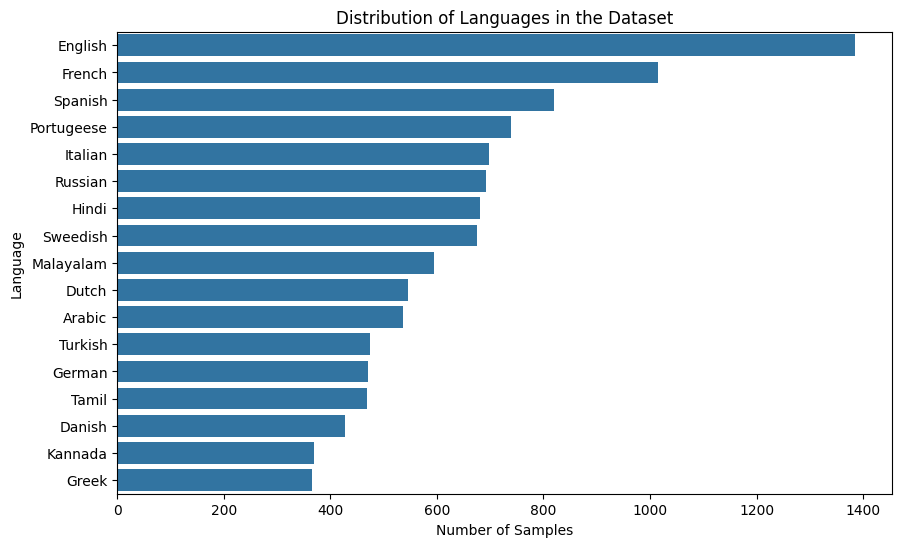

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Language', data=new_df, order=new_df['Language'].value_counts().index)
plt.title('Distribution of Languages in the Dataset')
plt.xlabel('Number of Samples')
plt.ylabel('Language')
plt.show()

A word cloud is a visual representation (image) of word data. In other words, it is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it's mentioned within a given text and the more important it is.  This is useful to understand the vocabulary and common words across all languages in the dataset.

Here's what the code will do:

1. **Combine All Text Data**:
   - It creates a string `text` by joining all the text data from the `Text` column of the DataFrame `df` into one long string. This string combines all the sentences or words in the dataset.

2. **Generate a Word Cloud**:
   - The `WordCloud` function from the `wordcloud` library is used to generate a word cloud from this combined text data.
   - `width=800` and `height=400` specify the dimensions of the word cloud image.
   - `background_color='white'` sets the background color of the word cloud to white.
   - `.generate(text)` processes the `text` string to create the word cloud, which shows the most frequently occurring words in the dataset.

3. **Display the Word Cloud**:
   - `plt.figure(figsize=(12, 6))` creates a new figure for displaying the plot with the specified dimensions.
   - `plt.imshow(wordcloud, interpolation='bilinear')` displays the generated word cloud image using Matplotlib, with smooth rendering via `interpolation='bilinear'`.

### Expected Result:
- The output is a visual representation of the most frequent words in your text dataset, where:
  - **Larger words** indicate higher frequency of appearance in the text data.
  - **Smaller words** are less frequent.
  - **Commonly used words** may appear prominently, unless you have removed stop words (e.g., "and", "the", etc.) from your data.

This word cloud can provide a quick and useful way to get an overall sense of the most prevalent words in your dataset.

In [30]:
from wordcloud import WordCloud

In the context of a WordCloud visualization, **interpolation** primarily refers to the way the displayed image of the word cloud is rendered on your screen or in your plots. Since the words in a WordCloud are essentially displayed as a "picture" of text in different sizes and orientations, interpolation comes into play when resizing or displaying this image to make it appear smoother and more visually appealing.

### Specifically, interpolation in a WordCloud:

- **Smoothing Edges**: When rendering the WordCloud, interpolation makes the edges of words look smoother and less pixelated, especially when zooming in, resizing, or viewing at different resolutions.
- **Image Quality**: It helps to maintain the readability of words in the cloud by ensuring the rendering process blends pixel values (like anti-aliasing for fonts), making transitions around text edges smoother.
- **Bilinear or Bicubic Options**: When displaying the word cloud with `plt.imshow()` in libraries like Matplotlib, specifying `interpolation='bilinear'` means the rendered image is displayed smoothly by blending pixels using bilinear interpolation. This results in a smoother, less "blocky" appearance compared to no interpolation.

In summary, using interpolation in a WordCloud ensures that the final displayed image appears visually pleasing and readable, with smooth transitions and minimal pixelation around the text shapes.

`plt.axis('off')` is a Matplotlib command that removes the axes from the plot. In the context of a WordCloud visualization, this is particularly useful because:

- **Improved Aesthetics**: It hides the x and y-axis, axis ticks, and labels, allowing the word cloud to be the main focus without unnecessary distractions.
- **Cleaner Presentation**: Since WordClouds are primarily visual representations of word frequency or prominence, having axes displayed is not meaningful. Turning them off gives a cleaner, more polished look to the word cloud.

Overall, this command ensures that the word cloud is displayed as a standalone visual element without any axis-related details that would not add any useful information for interpretation.

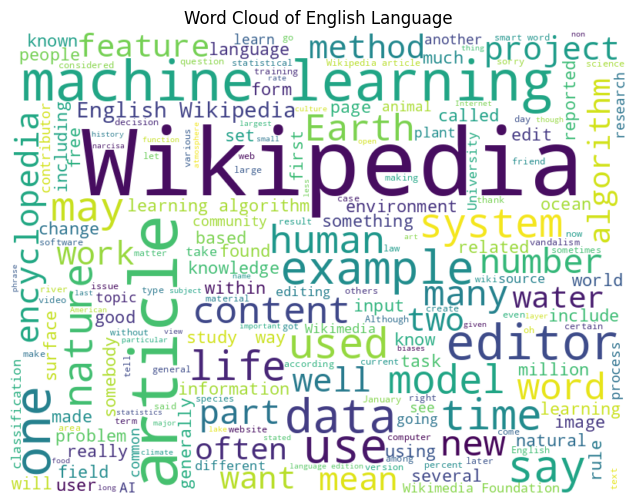

In [31]:
english_text = ' '.join(new_df[new_df['Language']=='English']['Text'].astype(str))
wordcloud = WordCloud(width=800, height=600, background_color='white').generate(english_text)


plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of English Language')
plt.show()

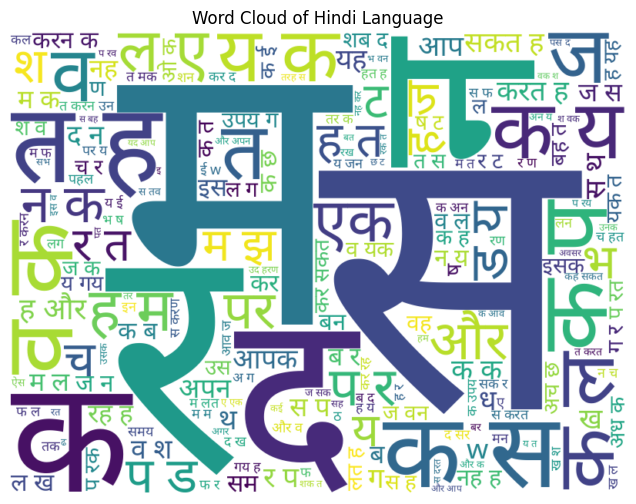

In [32]:
hindi_text = ' '.join(new_df[new_df['Language'] == 'Hindi']['Text'].astype(str))

# Path to your uploaded NotoSansDevanagari font file in Colab
font_path = "/content/NotoSans-Regular.ttf"

wordcloud = WordCloud(
    width=800,
    height=600,
    background_color='white',
    font_path=font_path
).generate(hindi_text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Hindi Language')
plt.show()

To generate a word cloud for any language, you'll first need to ensure that you have the correct Unicode font file that supports the characters for that particular language. This ensures that the word cloud displays characters properly and maintains the visual integrity of the script or text you are working with. Here's how you can approach this:

Steps to Generate a Word Cloud for a Specific Language:
Download a Suitable Unicode Font:

Identify and download a Unicode font that supports the language you are working with. For example:
For Hindi, you might use fonts like Noto Sans Devanagari or Cairo.
For Arabic, you might use fonts like Amiri, Cairo, or Lateef.
Ensure you are using a .ttf (TrueType Font) file.
Upload the Font to Your Environment (e.g., Colab):

If you're using a cloud-based notebook like Colab, you need to upload the .ttf file. You can do this with:
python
Copy code
from google.colab import files
uploaded = files.upload()  # Use this to upload your desired .ttf file
Generate the Word Cloud Using the Unicode Font:

Specify the path to your font file while creating the word cloud.

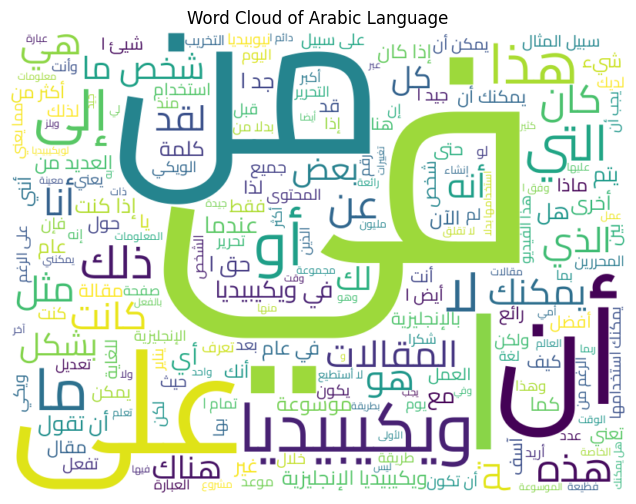

In [33]:
arabic_text = ' '.join(new_df[new_df['Language'] == 'Arabic']['Text'].astype(str))

# Path to your uploaded Cairo-arabic font file in Colab
font_path = "/content/Cairo-Regular.ttf"

wordcloud = WordCloud(
    width=800,
    height=600,
    background_color='white',
    font_path=font_path
).generate(arabic_text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Arabic Language')
plt.show()

Seperate independent and dependent features.

In [34]:
X = new_df['Text']
y = new_df['Language']

In [35]:
X.shape

(10954,)

In [36]:
y.shape

(10954,)

LABEL ENCODING

Label Encoding is a technique used to convert categorical labels into numeric values, which is required for machine learning algorithms to work with categorical data. Most machine learning models, especially those built using scikit-learn, expect the input data to be numeric rather than textual or categorical. This is because mathematical computations and optimization algorithms used in training models rely on numerical data.

Here’s why Label Encoding is needed:

Why Use Label Encoding for Categorical Data?
Machine Learning Models Require Numeric Input:

Most machine learning algorithms, like logistic regression, decision trees, and support vector machines, cannot work directly with categorical data (like text or non-numeric labels). They need numeric representations of the data.
For example, if you have labels like 'English', 'Hindi', and 'French', the model cannot process these as-is, so you need to convert them into numbers (like 0, 1, 2) for the algorithm to understand.
Representation of Categories as Numbers:

Label Encoding assigns a unique number to each category in the target variable (labels). For example:
'English' could be encoded as 0
'Hindi' could be encoded as 1
'French' could be encoded as 2
This is useful when you are working with classification problems where the labels represent different classes or categories.
Machine Learning Algorithms Handle Numbers Better:

Algorithms like Logistic Regression, Random Forest, SVMs, and Neural Networks work with numerical values and expect to perform mathematical operations like addition, multiplication, etc.
In contrast, categorical data, which is non-numeric, does not allow for these kinds of operations. Label Encoding transforms this categorical data into numbers, enabling these algorithms to handle the data correctly.
For Multi-Class Classification:

If you're working with a multi-class classification problem (like predicting language from a text), Label Encoding is a simple and effective way to convert each class into a number. This is especially useful when there are more than two possible outcomes (like multiple languages in your case).
Example of Label Encoding:
Suppose you have a column of languages in a dataset:

Language
English
Hindi
French
Hindi
English
Using LabelEncoder, you would convert it to:

Language	Encoded Language
English	0
Hindi	1
French	2
Hindi	1
English	0
The LabelEncoder simply assigns a unique number to each category:

English → 0
Hindi → 1
French → 2

LabelEncoder is used to convert categorical labels (like language names) into numerical values that machine learning algorithms can understand and process.
It’s primarily used on the target labels (y) in classification problems, not on the feature variables (X), unless they are ordinal in nature.

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
label_encoder = LabelEncoder()

In [39]:
y = label_encoder.fit_transform(y)

In [40]:
y.shape

(10954,)

TEXTPROCESSING

In [41]:
data_list = []

for text in X:
    text = re.sub(r'[!@#$(),"%^*?:;~`0-9।]',' ', text)
    text = re.sub(r'[\[\]]', ' ', text)
    text = text.lower()
    data_list.append(text)

In [42]:
data_list

[' nature  in the broadest sense  is the natural  physical  material world or universe.',
 ' nature  can refer to the phenomena of the physical world  and also to life in general.',
 'the study of nature is a large  if not the only  part of science.',
 'although humans are part of nature  human activity is often understood as a separate category from other natural phenomena.',
 '    the word nature is borrowed from the old french nature and is derived from the latin word natura  or  essential qualities  innate disposition   and in ancient times  literally meant  birth .',
 '    in ancient philosophy  natura is mostly used as the latin translation of the greek word physis  φύσις   which originally related to the intrinsic characteristics that plants  animals  and other features of the world develop of their own accord.',
 '       \nthe concept of nature as a whole  the physical universe  is one of several expansions of the original notion     it began with certain core applications of t

TOPIC -: Bag of Words
We need to convert input featires also in the numerical format.

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
cv = CountVectorizer()

In [81]:
X = cv.fit_transform(data_list)

In [82]:
X.shape

(10954, 39511)

In [83]:
X

<10954x39511 sparse matrix of type '<class 'numpy.int64'>'
	with 163127 stored elements in Compressed Sparse Row format>

In [84]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [85]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(alpha=1.0)


In [86]:
model.fit(x_train, y_train)

MultinomialNB()

In [87]:
y_pred = model.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [88]:
ac = accuracy_score(y_test, y_pred)


In [90]:
# Evaluate the model on training data
y_train_pred = model.predict(x_train)

In [91]:
train_accuracy = accuracy_score(y_train, y_train_pred)

In [92]:
print(train_accuracy)

0.9913271710601392


In [54]:
cm = confusion_matrix(y_test, y_pred)

In [89]:
print("Test Accuracy is :",ac)

Test Accuracy is : 0.9812870835235052


In [94]:
from sklearn.metrics import log_loss

In [96]:
train_loss = log_loss(y_train, model.predict_proba(x_train))

In [97]:
test_loss = log_loss(y_test, model.predict_proba(x_test))

Text(0.5, 1.0, 'Accuracy: Train vs Test')

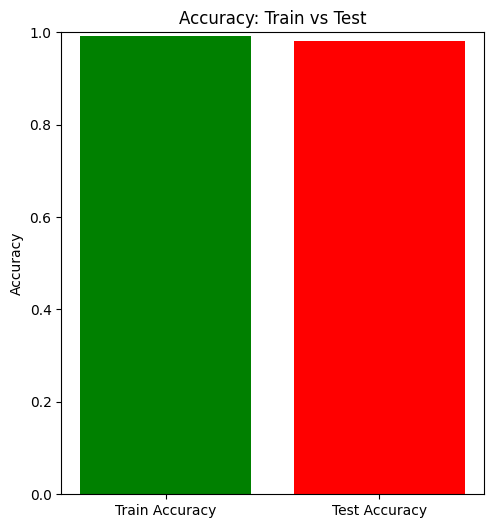

In [98]:
# Create a bar plot for final accuracy and loss values
plt.figure(figsize=(12, 6))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, ac], color=['green', 'red'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Accuracy: Train vs Test')

In [101]:
print(train_loss)
print(test_loss)

0.07605361844066859
0.10280979512053731


Text(0.5, 1.0, 'Loss: Train vs Test')

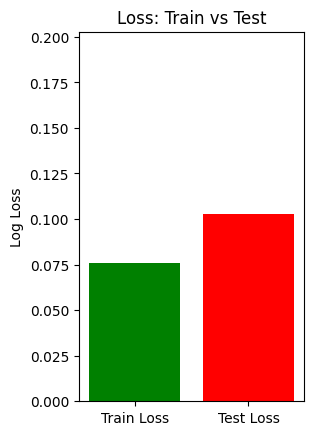

In [100]:
# Plotting loss
plt.subplot(1, 2, 2)
plt.bar(['Train Loss', 'Test Loss'], [train_loss, test_loss], color=['green', 'red'])
plt.ylim(0, max(train_loss, test_loss) + 0.1)
plt.ylabel('Log Loss')
plt.title('Loss: Train vs Test')


In [56]:
print(cm)

[[114   0   0   5   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  79   0   2   0   0   0   0   0   0   0   0   0   0   3   0   0]
 [  0   0 112   1   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 274   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1   2 202   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   2   0 105   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   4   0   0  76   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   2   0   0   0 117   0   0   0   0   0   0   0   0   0]
 [  0   0   0   2   0   0   0   0 144   0   0   0   0   1   0   0   0]
 [  0   0   0   3   0   0   0   0   0  68   0   0   0   0   0   0   0]
 [  0   0   0   4   0   0   0   0   0   0 111   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 142   0   1   0   0   0]
 [  0   0   0   6   0   0   0   0   0   0   0   0 134   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0   0   1   0 156   0   0   0]
 [  0 

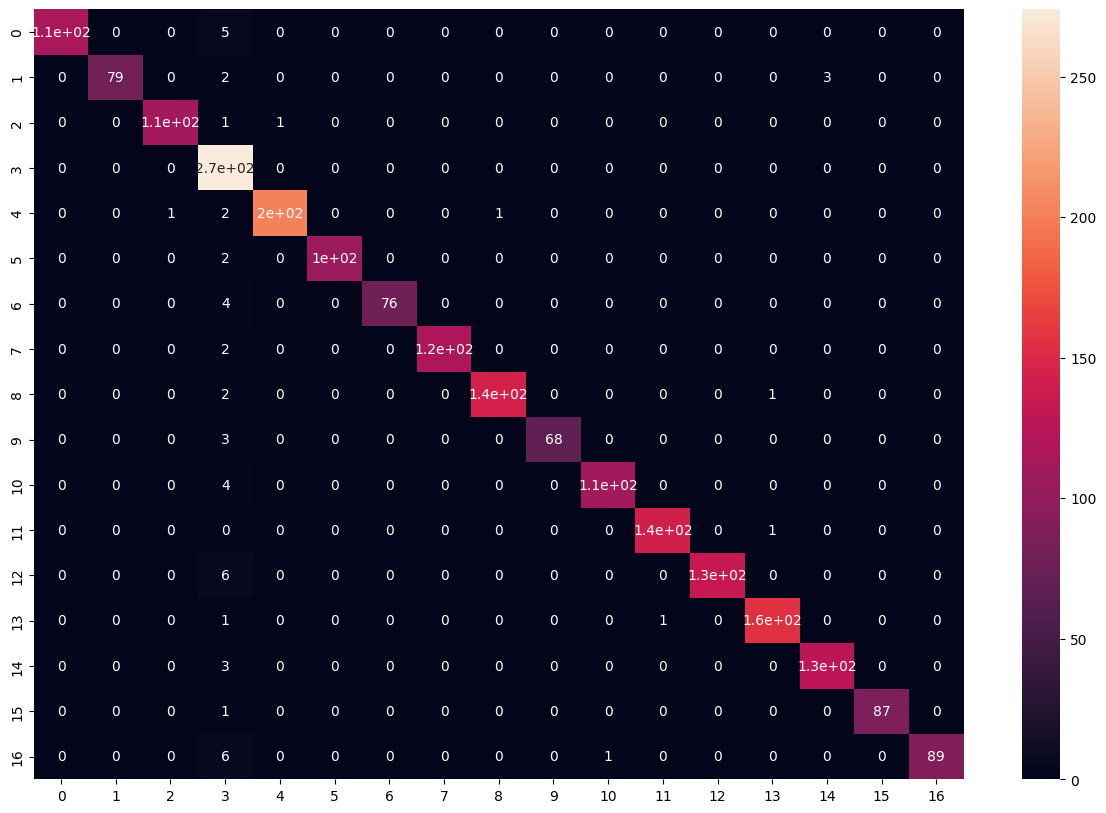

In [104]:
# visualising the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       119
           1       1.00      0.94      0.97        84
           2       0.99      0.98      0.99       114
           3       0.86      1.00      0.93       274
           4       1.00      0.98      0.99       206
           5       1.00      0.98      0.99       107
           6       1.00      0.95      0.97        80
           7       1.00      0.98      0.99       119
           8       0.99      0.98      0.99       147
           9       1.00      0.96      0.98        71
          10       0.99      0.97      0.98       115
          11       0.99      0.99      0.99       143
          12       1.00      0.96      0.98       140
          13       0.99      0.99      0.99       158
          14       0.98      0.98      0.98       130
          15       1.00      0.99      0.99        88
          16       1.00      0.93      0.96        96

    accuracy              

In [58]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = label_encoder.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language

In [59]:
predict("Analytics Vidhya fournit un portail de connaissances basé sur la communauté pour les professionnels de l'analyse et de la science des données")


The langauge is in French


In [60]:
predict("यह एक हिंदी वाक्य है।")

The langauge is in Hindi


In [61]:
predict("هذا جملة باللغة العربية.")

The langauge is in Arabic


In [62]:
predict("भारत का संविधान देश के प्रत्येक नागरिक को समानता, स्वतंत्रता, और न्याय की गारंटी देता है, और यह लोकतंत्र की बुनियादी धारा को बनाए रखता है।")

The langauge is in Hindi


In [64]:
predict("J'aime apprendre de nouvelles langues.")

The langauge is in French


In [65]:
predict("Bonsoir, comment ça va ?")

The langauge is in French


In [71]:
predict("Até breve!")

The langauge is in Portugeese


In [72]:
predict("Eu estou procurando")

The langauge is in Portugeese


In [102]:
predict("മലയാളം എഴുത്ത്")

The langauge is in Malayalam


In [103]:
predict("தமிழ் எழுத்து முறை - விக்கிப்பீடியா")

The langauge is in Tamil


In [105]:
import pickle

# Assuming your model is trained
with open('multinomialnb.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)


In [106]:
with open('your_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(cv, vectorizer_file)
